<a href="https://colab.research.google.com/github/sakuronohana/my_datascience/blob/master/udemy/mlaz/Part%204%20-%20Clustering/Section%2024%20-%20K-Means%20Clustering/Python/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning

Verlassen wir nun den Bereich des Überwachten Lernens (Supervised Learning) und widmen uns den unüberwachten Lernens (Unsupervised Learning). Beim unüberwachten Lernen muss der ML-Algorithmus die Datenstruktur selbst erkennen bzw. hat keine Labels (abhängige Variablen) welche im aufzeigen ob er richtig liegt oder nicht. Der Algorithmus gruppiert hierbei meist die verschiedenen ähnlichen Datenpunkte was Clustering genannt wird.
Clustering ähnelt der Klassifizierung, die Basis ist jedoch unterschiedlich. Beim Clustering weiss man nicht, wonach man sucht, und versucht, einige Segmente oder Cluster in den Daten zu identifizieren bzw. abhängie Variablen zu erörtern. Wenn man Clustering-Algorithmen für den Datensatz vewendet, können plötzlich unerwartete Dinge wie Strukturen, Cluster und Gruppierungen auftauchen, an die man sonst nie gedacht hätte.



## K-Means Clustering

Der **k-Means-Algorithmus** ist ein Verfahren zur Vektorquantisierung, welches auch zur Clusteranalyse verwendet wird. Dabei wird aus einer Menge von ähnlichen Objekten eine vorher bekannte Anzahl von k Gruppen gebildet. Der Algorithmus ist eine der am häufigsten verwendeten Techniken zur Gruppierung von Objekten, da er schnell die Zentren der Cluster findet. Dabei bevorzugt der Algorithmus Gruppen mit geringer Varianz bzw. Distanz und ähnlicher Größe. 

k-Means Clustering funtioniert in etwa wie folgt:

![alt text](https://image.slidesharecdn.com/kmeansclusteringalgorithmkmeansclusteringexamplemachinelearningalgorithmssimplilearn-180323072616/95/k-means-clustering-algorithm-k-means-clustering-example-machine-learning-algorithms-simplilearn-32-1024.jpg?cb=1521790168)

Nehmen wir an, das wir die Inputs x1, x2, x3 .... und den K-Wert,

1. Schritt: Zufallsauswahl von k als Cluster Center (Centroids) *Hinweis: Centroids befinden sich nicht wirklich im Cluster-Center*
Mathematisch sieht das wie folgt aus, wobei *C* die Summe aller Centroids und $c_n$ jeden einzelnen Centroid darstellt:

      $C= c_1,c_2,...c_k$
      
2. Schritt:  Zuweisung jedes xi zum nächsten Cluster durch die Berechnung der Distanz zu jedem Centroid. Bspw. x1 zu c1, c2 und c4.

    $arg  min  dist (c_i, x)^2$
    
    $^C_i \in C$

3. Schritt: Suchen eines neuen Cluster Centers mittels arithmetischen Mittels der bereits zugewiesenen Datenpunkte.

4. Schritt: Wiederholen der Schritte 2 und 3 bis sich die Positionen der Centroids nicht mehr verändern.


Zur Ermittlung der Distanzen werden die gleichen Distanzfunktionen (Euc) eingesetzt wie bei KNN.

**Wichtige Begriffe:** 

* Unlabeled Daten = Geben in Gegensatz zu gelabelten Daten keine Lösung vor. 
* K = Anzahl Datenpunkte die gewählt werden um Cluster zu bilden.
* Cluster centroids = Nennt man die mit K ausgewählten Datenpunkte.

### Elbow Method

Um die richtige Anzahl von Clustern auszuwählen, verwenden wir die Ellbogenmethode .
Die Elbow-Methode führt einen K-Mittelwert-Algorithmus für eine unterschiedliche Anzahl von Clustern aus und ermittelt die Summe der quadratischen Abstände jedes Datenpunkts vom Schwerpunkt des Clusters, auch als innerhalb der Cluster-Summe der Quadrate (**W**ithin **C**luster **S**um of **S**quares) bezeichnet. Wenn wir nur einen Cluster haben, finden wir die Summe der quadratischen Abstände für jeden Datenpunkt vom Schwerpunkt.

<img src='https://miro.medium.com/max/1400/1*xc_oktEgovT1dlM1tKA4-w.png' width=500>

Wir finden das WCSS für ein bis sechs Cluster und zeichnen dann das WCSS mit der Anzahl der Cluster wie unten gezeigt.
Die Position der Biegung oder des Ellbogens oder der plötzliche Abstandabfall im Diagramm wird als angemessene Anzahl von Clustern angesehen.
In unserem Fall sehen wir das bei 2 und das ist die Anzahl der geeigneten Cluster.

<img src='https://miro.medium.com/max/1400/1*kt_MxQxFWOKz3RDuw40pgA.png' width=500>

### Random initialization trap (dt. Zufällige Initialisierungsfalle)

Wenn die Zentroide zufällig initialisiert werden, erzeugt jeder Lauf von k Mittel unterschiedliche WCSS. Eine falsche Auswahl der Schwerpunkte führt zu einer suboptimalen Clusterbildung.
Um das Problem falscher Zentroide zu lösen, verwenden wir K-means ++, wobei wir die Zentroide bei der Initialisierung so weit wie möglich auswählen.
Die Idee ist, Zentroide zu haben, um unterschiedliche Clusterzentren zu erstellen, damit eine optimale Clusterbildung schnell konvergiert.




## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

Beim folgenden Datensatz geht es um eine Anzahl Kunden eines Shoppingcenters bei welchen das Geschlecht, Alter, jährliches Einkommen und Ausgaben in Form einer Werteskala erfasst wurden. In diesem Datensatz besteht kein abhängige Variable. Mittels Clustering wir aber eine solche erstellt. 

In [2]:
datloc = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/udemy/mlaz/Part%204%20-%20Clustering/Section%2024%20-%20K-Means%20Clustering/Python/Mall_Customers.csv'
dataset = pd.read_csv(datloc)

# Wir benötigen nur das jährlich Einkommen und der Spending Score
X = dataset.iloc[:,[3,4]].values

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Using the elbow method to find the optimal number of clusters

Mittels des folgenden Codes werden wir nun die optimale Anzahl der Cluster ermitteln. 

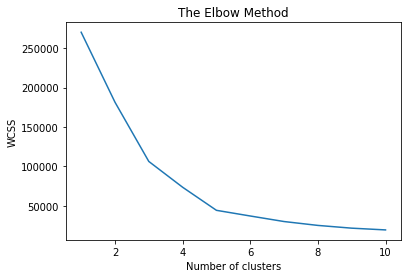

In [4]:
from sklearn.cluster import KMeans
wcss = [] # Definition der List für die Resultate 

for i in range(1,11): # 10 For-Iterationen für 10 Cluster ausprobieren 
  # Wir erstellen nun die einzelnen KMeans Objekte und verwenden K-Means++
  # um die Random initialization trap zu umgehen. 
  kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
  # Nun fitten die einzelnen Cluster
  kmeans.fit(X)
  # und fügen die Resultate unserer WCSS Liste hinzu. 
  wcss.append(kmeans.inertia_)

# Nachfolgend wollen wir die Resultate der Elbow Methode visualisieren
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

## Visualising the clusters